# Importing necessary library

In [214]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [139]:
# Generating synthetic data and making it only one class
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)
X = X[y == 0]
y = y[y == 0]


In [188]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
X_val

array([[ 0.30834648,  1.08419824,  0.74788269, ..., -0.00918235,
         1.21242813,  0.19839352],
       [-0.30995383,  1.46785044,  0.07721533, ..., -1.72406181,
         1.48983737,  2.5988229 ],
       [-0.18696373, -1.23243124,  0.13986916, ...,  1.66992278,
         1.20348463,  1.68918893],
       ...,
       [-0.12143364,  0.38638265, -0.30838393, ..., -2.91425599,
        -0.52273716, -0.67923065],
       [ 0.72635187, -0.55308982,  0.61322266, ..., -0.27254472,
        -0.89651565,  1.17344228],
       [ 0.24652057, -0.45099402,  0.47923929, ..., -0.057964  ,
         0.58153992, -0.77254211]])

In [227]:
# Generating anomalies in the validation set by adding noise.
num_anomalies = int(0.5 * len(X_val))
anomaly_indices = np.random.choice(len(X_val), num_anomalies, replace=False)

# Modify anomaly samples
X_val[anomaly_indices] += np.random.normal(0, 1, size=X[anomaly_indices].shape)
print(X_val)

# Labels for anomalies (1 for anomaly, 0 for normal)
y_val[anomaly_indices] = 1
print(y_val)



[[-1.87964995  3.55095098  2.2513837  ... -0.50536544  0.22135169
  -1.34709611]
 [-0.43785706  2.03547785  0.59885246 ... -2.08997489  1.02262118
   2.05814131]
 [-0.18696373 -1.23243124  0.13986916 ...  1.66992278  1.20348463
   1.68918893]
 ...
 [ 0.17759319 -0.66208547  2.32920643 ... -3.60147045 -0.25562415
  -2.48996798]
 [ 0.10746579  0.84787617  0.24819635 ...  0.33861626 -1.31639692
   1.17923292]
 [ 1.05397775  0.26794275  0.36313195 ... -0.4841858   0.48567528
  -1.84551504]]
[1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1]


In [228]:
# This below function is used to calculate the mean and variance of the features in the dataset.
def estimate_gaussian(X):
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape

    mu = 1 / m * np.sum(X, axis=0)
    var = 1 / m * np.sum((X - mu) ** 2, axis=0)

    return mu, var

In [229]:
# mean, variance = estimate_gaussian(X_train)

In [230]:
# The below function is used to calculate the probability density of a Gaussian distribution for data points.
def calculate_probability(X, mu, var):
    """
    Calculates the probability density of a Gaussian distribution for all data points in X

    Args:
        X (ndarray): (m, n) Data matrix
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features

    Returns:
        px (ndarray): (m,) Probability density for each data point in X
    """

    m = X.shape[0]
    px = np.zeros(m)

    for i in range(m):
        constant_term = 1 / (np.sqrt(2 * math.pi * var[i]))
        exponent_term = np.exp(-((X[i] - mu[i]) ** 2) / (2 * var[i] ** 2))
        px[i] = constant_term * exponent_term

    return np.prod(px)


In [231]:
mu, var = estimate_gaussian(X_train)

px = calculate_probability(X_train[10], mu, var)
"{:.12f}".format(float(px))

'0.000028243978'

In [232]:
# This below function is used to predict whether a data point is an anomaly or not.
def anomaly_predict(epsilon, test_data):
    mu, var = estimate_gaussian(X_train)
    px = calculate_probability(test_data, mu, var)
    if px < epsilon:
        return 1

    elif (px >= epsilon):
        return 0
    else:
        return None



In [233]:
# Testing the anomaly_predict function
test_data = X_val[5]
epsilon = 0.0000004
pred = anomaly_predict(epsilon=epsilon, test_data=test_data)
if pred == 1:
    print("Anomaly data")

elif pred == 0:
    print("Normal data")

else:
    print("Something went wrong")


1

In [234]:
# The below code is used to evaluate the model on the validation set.
predicted_labels = []

for data in X_val:
    predicted_label = anomaly_predict(epsilon=epsilon, test_data=data)
    predicted_labels.append(predicted_label)

predicted_labels = np.array(predicted_labels)

true_labels = np.ones(len(X_val))

precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)


def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d",
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()



Precision: 1.0
Recall: 0.8157894736842105
F1-score: 0.898550724637681


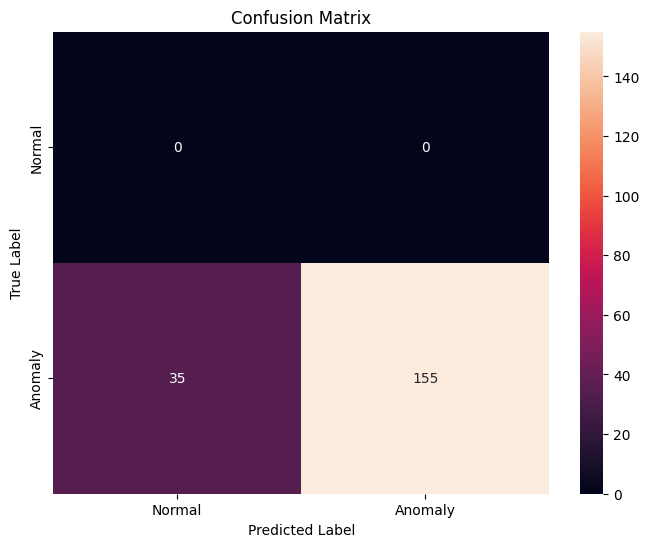

In [235]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
plot_confusion_matrix(conf_matrix)


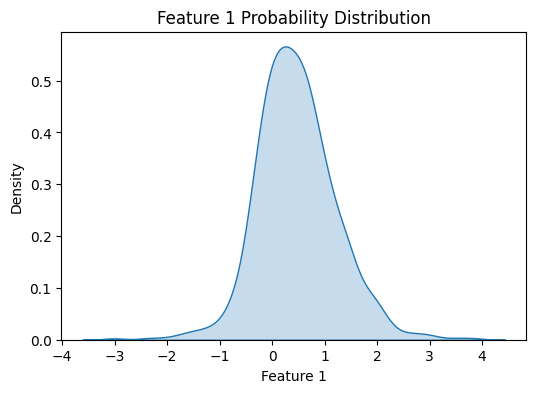

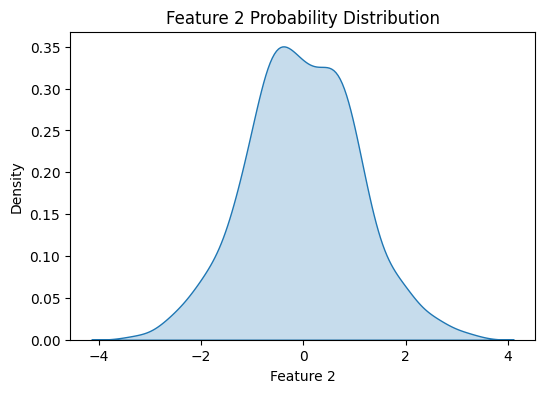

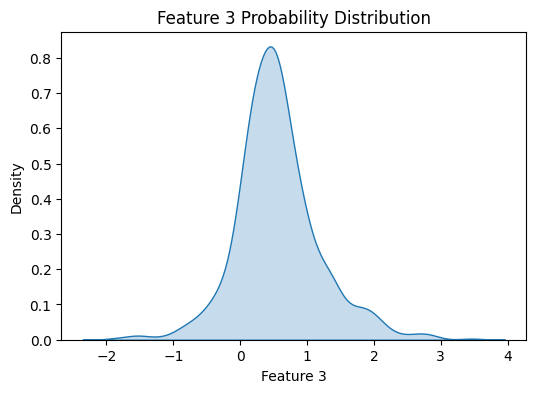

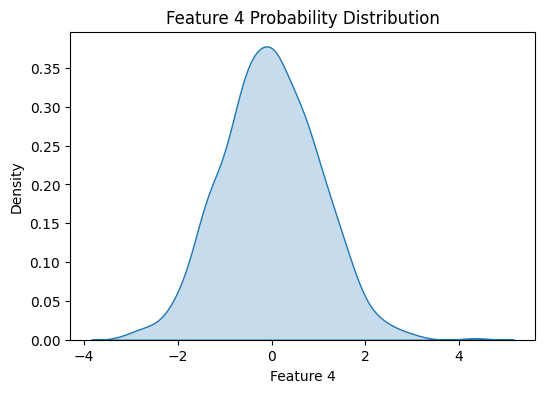

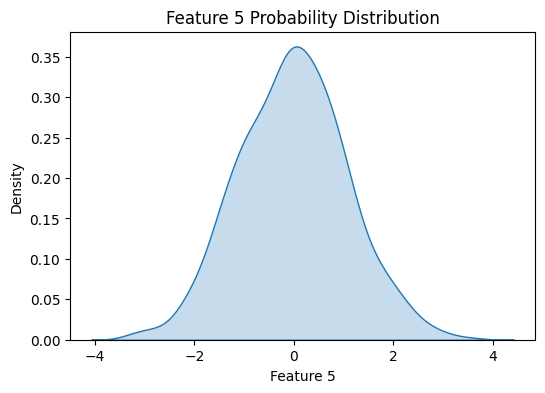

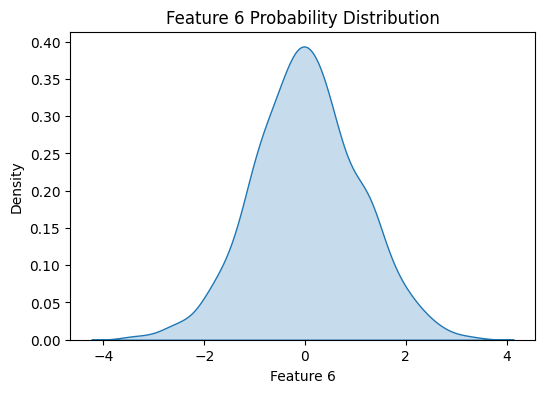

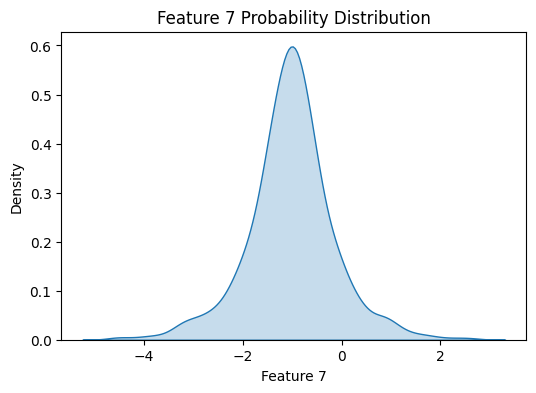

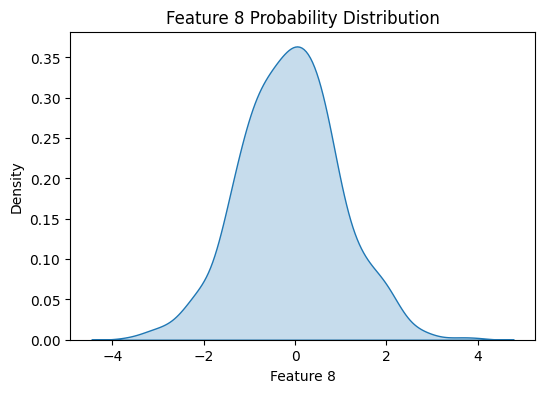

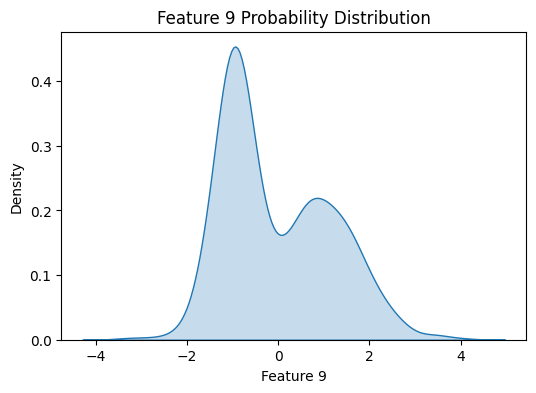

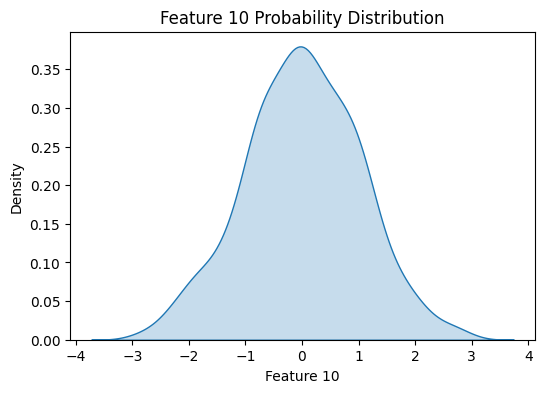

In [206]:
# This below function is used to plot the probability distribution of each feature using KDE plots in separate plots.
def plot_individual_distribution(X_train):
    """
    Plots the probability distribution of each feature using KDE plots in separate plots

    Args:
        X (ndarray): (m, n) Data matrix
        px (ndarray): (m, n) Probability density for each data point in X
    """

    num_features = X_train.shape[1]

    for i in range(num_features):
        plt.figure(figsize=(6, 4))
        sns.kdeplot(data=X_train[:, i], fill=True)
        plt.title(f'Feature {i + 1} Probability Distribution')
        plt.xlabel(f'Feature {i + 1}')
        plt.ylabel('Density')
        plt.show()


plot_individual_distribution(X_train)


In [ ]:
# We can also use sklearn to make a model that can predict the anomalies in the dataset.